In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.metrics import r2_score, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_test_model(reg, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)   # Make prediction on the training data
    y_test_pred = reg.predict(X_test)  # Make predictions on test data
    return y_train_pred, y_test_pred

# Numerical Analysis on the RMSE, R^2 and return the plot of y_true versus y_predicted
def anaylsisplt( X_test, y_train, y_train_pred, y_test, y_test_pred):
    rms1 = sqrt(mean_squared_error(y_train, y_train_pred))
    rms1 = round(rms1,5)
    rms2 = sqrt(mean_squared_error(y_test, y_test_pred))
    rms2 = round(rms2, 5)
    print('Returns the coefficient of determination R^2 of the prediction is {0:.3f}.'.format(reg.score(X_test, y_test)))
    fig = plt.figure()
    axx1 = fig.add_subplot(111)
    axx1.scatter(y_train, y_train_pred, s=1, c='b', marker="s")
    axx1.scatter(y_test, y_test_pred, s=10, c='r', marker="s")
    z = np.polyfit(y_test, y_test_pred, 1)
    plt.text(-3.5, -0.5, 'Train RMSE = %s\n Test RMSE = %s\n' % (rms1, rms2))
    p = np.poly1d(z)
    axx1.plot(y_test, p(y_test), "k--")
    plt.show()

In [3]:
# Enter the filename and Target group anaylzed in the future steps
# filename = input('Input the filename you want to anaylsis:')
# group = int(input('Which group do you want to anaylsis(1:OH or 0:CO):'))
df = pd.read_csv('Results_ML6_ABS.csv')

# Features interested and implemented in the machine learing alogorithm
selected_features = [u'nega_1', u'nega_2', u'nega_3',  u'nega_4', u'nega_5', u'nega_6',u'nega_7',u'nega_8',
u'aff_1', u'aff_2', u'aff_3',   u'aff_4',  u'aff_5',  u'aff_6', u'aff_7', u'aff_8',
u'val_1',  u'val_2',  u'val_3', u'val_4', u'val_5',  u'val_6', u'val_7', u'val_8', 
u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8',  u'ioni2_1', u'ioni2_2',  
u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' ,  u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  
                    u'radius_5', u'radius_6',u'radius_7',u'radius_8',u'redox_1', u'redox_2',   u'redox_3', u'redox_4',  
                    u'redox_5', u'redox_6',u'redox_7',u'redox_8',u'TC_1',u'TC_2', u'TC_3', u'TC_4',  
                    u'TC_5', u'TC_6',u'TC_7',u'TC_8',u'HF_1',u'HF_2', u'HF_3', u'HF_4',  
                    u'HF_5', u'HF_6',u'HF_7',u'HF_8',u'resis_1',u'resis_2', u'resis_3', u'resis_4',  
                    u'resis_5', u'resis_6',u'resis_7',u'resis_8', u'iradius_1',u'iradius_2', u'iradius_3', u'iradius_4',  
                    u'iradius_5', u'iradius_6',u'iradius_7',u'iradius_8', u'oxir_1',u'oxir_2', u'oxir_3', u'oxir_4',  
                    u'oxir_5', u'oxir_6',u'oxir_7',u'oxir_8',u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  
                    u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  
                    u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4',  
                    u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  
                    u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8', u'EC_1',u'EC_2', u'EC_3', u'EC_4',  
                    u'EC_5', u'EC_6',u'EC_7',u'EC_8', u'NC_1',u'NC_2', u'NC_3', u'NC_4',  
                    u'NC_5', u'NC_6',u'NC_7',u'NC_8',u'NM_1',u'NM_2', u'NM_3', u'NM_4',  
                    u'NM_5', u'NM_6',u'NM_7',u'NM_8', u'SH_1',u'SH_2', u'SH_3', u'SH_4',  
                    u'SH_5', u'SH_6',u'SH_7',u'SH_8',u'LCx_1',u'LCx_2', u'LCx_3', u'LCx_4',  
                   u'LCx_5', u'LCx_6',u'LCx_7',u'LCx_8',u'LCz_1',u'LCz_2', u'LCz_3', u'LCz_4',  
                    u'LCz_5', u'LCz_6',u'LCz_7',u'LCz_8']
# selected_features = [ u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8',  u'ioni2_1', u'ioni2_2',  
# u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' ,  u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  
#                      u'radius_5', u'radius_6',u'radius_7',u'radius_8',u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  
#                      u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  
#                      u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4',  
#                      u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  
#                      u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8']
target = u'Mag'
# In[13]:
X = df[selected_features].values
y = df[target].values
print(X.shape)

(501, 176)


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
import math


X = preprocessing.normalize(X, norm='max')
print(X[0])

#kf = KFold(**parameters)
#kf.get_n_splits(X)
#print(kf)
#for train_index, test_index in kf.split(X):
   # X_train, X_test = X[train_index], X[test_index]
   # y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

[ 6.21274425e-08  6.02911055e-08  5.97131676e-08  6.19245002e-08
  6.07520293e-08  6.19622676e-08  5.99354421e-08  5.63843345e-08
  8.77336242e-05  8.54600986e-05  8.46824197e-05  5.04096805e-05
  4.92223798e-05  8.73428587e-05  9.04384455e-05  4.53503500e-05
  1.02208061e-07  9.85496353e-08  9.73984126e-08  2.08722459e-07
  2.05224675e-07  1.01821454e-07  9.84874184e-08  1.90481387e-07
  9.79168994e-03  9.50122596e-03  9.40975960e-03  1.02332010e-02
  1.00412661e-02  9.76607902e-03  9.60490896e-03  9.32241483e-03
  4.99233611e-02  4.84942128e-02  4.80348345e-02  4.75111624e-02
  4.66000660e-02  4.97896621e-02  5.42138248e-02  4.32630946e-02
  4.02121299e-04  3.90184483e-04  3.86447857e-04  4.15511508e-04
  4.07715666e-04  4.01091982e-04  3.79354641e-04  3.78503030e-04
  1.55607313e-09  1.49832304e-09  1.48386232e-09  1.76609136e-09
  1.73513409e-09  1.55328911e-09 -1.99447997e-09  1.60347226e-09
  1.53887977e-04  1.51761484e-04  1.50424194e-04  1.71257975e-04
  1.67823776e-04  1.53452

In [5]:
#from sklearn.decomposition import PCA

# Let's pick a n_components
#n_components = 26

#pca = PCA(n_components)

#X_train = pca.fit_transform(X_train)# fit: get V, lambda; transform: X_train*V
#X_test = pca.transform(X_test)

#pca_range = np.arange(n_components) + 1
#pca_names = ['PCA_%s' % i for i in pca_range]
#plt.bar(pca_range[:26], pca.explained_variance_[:26], align='center')
#xticks = plt.xticks(pca_range[:26], pca_names, rotation=90)
#plt.ylabel('Variance Explained')

In [6]:
#Scikit_learning_neural_network_parameters
 #Random Forest Regressor Method
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
# Random forest feature importance
#rf_reg = RandomForestRegressor()
#rf_reg.fit(X_train, y_train)
#for feature in zip(selected_features, rf_reg.feature_importances_):
#    #print(rf_reg.feature_importances_)
#    sfm = SelectFromModel(rf_reg, threshold=0.0005)
#    sfm.fit(X_train, y_train)
#    #print(rf_reg.feature_importances_)
#for feature_list_index in sfm.get_support(indices=True):
#    print(selected_features[feature_list_index])
#X_train = sfm.transform(X_train)
#X_test = sfm.transform(X_test)
# recursive feature elimination
estimator = xgb.XGBRegressor()
selector = RFECV(estimator, step=1, cv=3)
selector = selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)
for feature_list_index in selector.get_support(indices=True):
   print(selected_features[feature_list_index])
selector.support_ 
print(selector.ranking_) 
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

Optimal number of features : 98
nega_1
nega_2
nega_3
nega_4
nega_5
nega_6
nega_7
nega_8
aff_1
aff_2
aff_3
aff_7
aff_8
val_1
val_2
val_5
val_7
val_8
ioni1_4
ioni1_5
ioni2_1
ioni2_2
ioni2_3
ioni2_4
ioni2_5
ioni2_7
radius_3
radius_5
radius_6
radius_8
redox_5
TC_2
TC_7
TC_8
HF_2
HF_3
HF_4
HF_5
HF_6
resis_1
resis_2
resis_3
resis_6
resis_7
resis_8
iradius_2
iradius_3
iradius_8
oxir_5
oxir_7
hyden_1
hyden_2
hyden_3
hyden_6
hyden_7
ioni3_1
ioni3_2
ioni3_3
ioni3_4
ioni3_6
ioni3_7
ioni4_1
ioni4_2
ioni4_4
ioni4_6
ioni4_7
ioni5_1
ioni5_2
ioni5_5
ioni5_6
ioni5_7
ioni5_8
EC_3
EC_5
EC_7
EC_8
NC_1
NC_2
NC_3
NC_5
NC_7
NC_8
NM_4
NM_5
NM_6
NM_8
SH_6
SH_7
LCx_3
LCx_4
LCx_5
LCz_1
LCz_2
LCz_3
LCz_4
LCz_5
LCz_7
LCz_8
[ 1  1  1  1  1  1  1  1  1  1  1 54 23  6  1  1  1  1 35 79  1 19  1  1
 27 67 22  1  1 14 24 11  1  1  1  1  1 76  1 10 12 25  1  8  1  1  4  1
 68 66 51 73  1 36 28 74 32  1 37 56  7 63  1  1 64  1  1  1  1  1 45  2
  1  1  1 61 52  1  1  1 43  1  1 53 33 20 46  1 78 72 62  5  1  3  1 38
  1 

In [7]:
#xgboost parameter tunning using GridSearchCV

estimator = xgb.XGBRegressor()

estimator.get_params().keys()

param_grid = {
    'booster': ['gbtree'],
    'max_depth':[7],
    'learning_rate':[0.055],
    'min_child_weight':[3], 
    'gamma':[0.11],
    'subsample':[0.52],
    'colsample_bytree':[0.71],
    'reg_alpha':[0.3]
  #  'objective':['reg:gamma']

}
gbm = GridSearchCV(estimator, param_grid,scoring='neg_mean_absolute_error', cv=10, verbose=1, n_jobs=4)
gbm.fit(X_train, y_train)
y_pred0 = gbm.predict(X_train)
y_pred = gbm.predict(X_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.4s finished


In [8]:
# Searching for outliers
# for i in range(len(y_test)):
#     if y_test[i] > 3 and y_test[i] < 3.3:
#         if y_pred[i]>1.5 and y_pred[i]<2.:
#             list_p =[y_test[i], y_pred[i]]
#             print(str(list_p))

Baseline: -0.41 (0.05) MSE
Best parameters found by grid search are: {'booster': 'gbtree', 'colsample_bytree': 0.71, 'gamma': 0.11, 'learning_rate': 0.055, 'max_depth': 7, 'min_child_weight': 3, 'reg_alpha': 0.3, 'subsample': 0.52}
The rmse of train prediction is: 0.20200223568192008
The rmse of test prediction is: 0.4725697223427002
The MAE of train prediction is: 0.15240473085045816
The MAE of test prediction is: 0.37583117514081527
0.8748510815066731


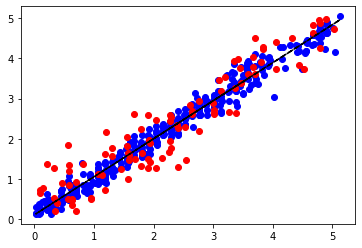

In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train,scoring = 'neg_mean_absolute_error', cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# Print Result and Output figure
print('Best parameters found by grid search are:', gbm.best_params_)
print('The rmse of train prediction is:', mean_squared_error(y_train, y_pred0) ** 0.5)
print('The rmse of test prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_pred))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_pred0)
y2 = np.array(y_pred)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")
print(r2_score(y_test, y_pred))

In [15]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(98, input_dim=98, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Baseline: -0.49 (0.10) MSE


In [ ]:
from sklearn.neural_network import MLPRegressor

est = MLPRegressor(hidden_layer_sizes=(300,),
                                       activation='logistic',
                                       solver='lbfgs',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.004)
est.fit(X_train, y_train)
y_predA0 = est.predict(X_train)
y_predA = est.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predA0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predA))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_predA0)
y2 = np.array(y_predA)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")

In [ ]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0, coef0=1, degree=2, gamma=None, kernel='linear',
            kernel_params=None)
clf.fit(X_train, y_train)
y_predL0 = clf.predict(X_train)
y_predL = clf.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predL0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predL))